0 exists
1 exists
173


<function matplotlib.pyplot.show(*args, **kw)>

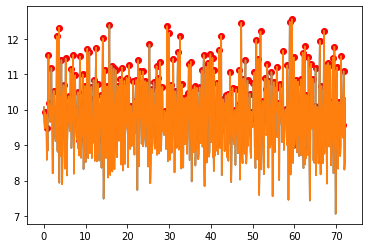

In [11]:
import numpy as np
import csv
import matplotlib.pyplot as plt



accelerometer_sensor_data = 'Accelerometer.csv'


data = np.genfromtxt(accelerometer_sensor_data, delimiter=',')
data = data[1:,1:]


accel_mag = np.zeros(len(data))
#time_stamp = np.linspace(.004,19.304 , 194)
time_stamp = np.linspace(.001,72.203 , 723)

for i in range(len(data)):
    time_stamp[i] = data[i][0] / 1000

    accel_mag[i] = (np.square(data[i][1]) + np.square(data[i][2]) + np.square(data[i][3]))**.5







plt.plot(time_stamp, accel_mag)

peaks = []
max_val = -np.Inf
N = len(accel_mag)
peaks = []
thresh = 0
for i in range (0,N):
    if (accel_mag[i] > thresh):
        if (i == 0 and accel_mag[i] >= accel_mag[i+1]):
            print("0 exists")
        elif (i == N-1 and accel_mag[i] >= accel_mag[i-1]):
            print("1 exists")
        elif (accel_mag[i] >= accel_mag[i-1] and accel_mag[i] >= accel_mag[i+1]):
            peaks.append((time_stamp[i],accel_mag[i]))
        else:
            pass
    else:
        pass

max_peaks = np.array(peaks)
print(len(max_peaks))


plt.scatter(max_peaks[:,0],max_peaks[:,1],color = 'red')
plt.plot(time_stamp, accel_mag)
plt.show


    


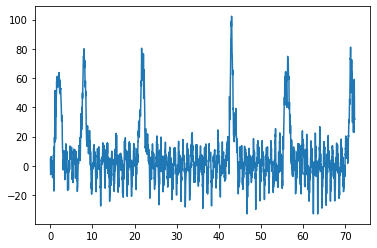

4.666822372164345


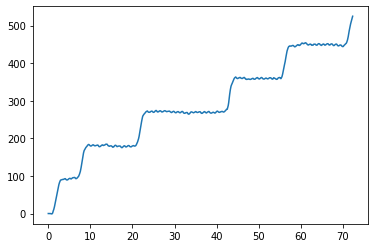

In [32]:
gyroscope_sensor_data = 'Gyroscope.csv'
data = np.genfromtxt(gyroscope_sensor_data, delimiter=',')
data = data[1:,1:]

gyro_data = np.zeros(7233)
#gyro_data = np.zeros(3012)

for i in range(len(gyro_data)):
    gyro_data[i] = np.rad2deg(data[i][3])

time_stamp = np.linspace(.001,72.322,7233)
#time_stamp = np.linspace(.001,31.011,3012)


plt.figure()
plt.plot(time_stamp,gyro_data)
plt.show()

print(gyro_data[0])

def Angle_t(angular_velocity, delta_t, t):
    
    theta = 0
    i_limit = 100*( t - .001)
    #i_limit = 100*( t - .001)
    for i in range(int(i_limit)):
        theta = theta + (gyro_data[i] * delta_t)

    return theta

degree = np.zeros(len(time_stamp))
for i in range(len(time_stamp)):
    degree[i] = Angle_t(gyro_data, .010, time_stamp[i])

plt.plot(time_stamp,degree)

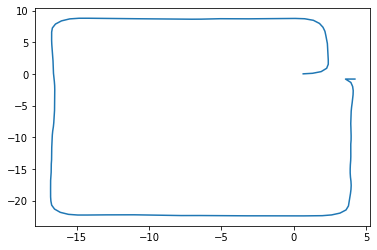

In [33]:


theta_i = np.zeros(len(max_peaks))

for i in range(len(theta_i)-1):
    deg_cur = np.deg2rad(Angle_t(gyro_data, .010, max_peaks[i][0]))
    deg_next = np.deg2rad(Angle_t(gyro_data, .010, max_peaks[i+1][0]))
    theta_i[i] = (deg_cur + deg_next)/2

x_i = np.zeros(len(max_peaks))
y_i = np.zeros(len(max_peaks))
time_stamp_peaks = np.zeros(len(max_peaks))

for i in range(len(x_i)):
    x_i[i] = x_i[i-1] + (.65 * np.cos(theta_i[i]))
    y_i[i] = y_i[i-1] + (.65 * np.sin(theta_i[i]))
    time_stamp_peaks[i] = max_peaks[i][0]

plt.figure()
plt.plot(x_i, y_i)


